# Laboratorio 1: Análisis Exploratorio, Clustering, PCA y Apriori

* Eric Mendoza 15002
* Marlon Fuentes 15240

---
## Preparación de entorno de ejecución
### Carga de librerías




In [0]:
import os
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from scipy import stats
import copy


In [0]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler,Normalizer,MinMaxScaler, RobustScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min


### Carga de data
Cargar test.csv desde github.


In [0]:
url = 'https://raw.githubusercontent.com/fuentesmarlon/CLUSTERING-PCA-APRIORI/master/train.csv'
df = pd.read_csv(url)

## 1. Análisis exploratorio
Se tienen las siguientes columnas.

In [43]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Se muestra a continuación una muestra del conjunto de datos. 


In [44]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Se debe asignar a cada variable el tipo correcto de dato para poder realizar los análisis necesarios.

In [0]:
df['Id'] = df['Id'].astype('category')
df['MSSubClass'] = df['MSSubClass'].astype('category')
df['MSZoning'] = df['MSZoning'].astype('category')
df['Street'] = df['Street'].astype('category')
df['Alley'] = df['Alley'].astype('category')
df['LotShape'] = df['LotShape'].astype('category')
df['LandContour'] = df['LandContour'].astype('category')
df['Utilities'] = df['Utilities'].astype('category')
df['LotConfig'] = df['LotConfig'].astype('category')
df['LandSlope'] = df['LandSlope'].astype('category')
df['Neighborhood'] = df['Neighborhood'].astype('category')
df['Condition1'] = df['Condition1'].astype('category')
df['Condition2'] = df['Condition2'].astype('category')
df['BldgType'] = df['BldgType'].astype('category')
df['HouseStyle'] = df['HouseStyle'].astype('category')
df['OverallCond'] = df['OverallCond'].astype('category')
df['YearBuilt'] = df['YearBuilt'].astype('category')
df['YearRemodAdd'] = df['YearRemodAdd'].astype('category')
df['RoofStyle'] = df['RoofStyle'].astype('category')
df['RoofMatl'] = df['RoofMatl'].astype('category')
df['Exterior1st'] = df['Exterior1st'].astype('category')
df['Exterior2nd'] = df['Exterior2nd'].astype('category')
df['MasVnrType'] = df['MasVnrType'].astype('category')
df['ExterQual'] = df['ExterQual'].astype('category')
df['ExterCond'] = df['ExterCond'].astype('category')
df['Foundation'] = df['Foundation'].astype('category')
df['BsmtQual'] = df['BsmtQual'].astype('category')
df['BsmtCond'] = df['BsmtCond'].astype('category')
df['BsmtExposure'] = df['BsmtExposure'].astype('category')
df['BsmtFinType1'] = df['BsmtFinType1'].astype('category')
df['BsmtFinType2'] = df['BsmtFinType2'].astype('category')
df['Heating'] = df['Heating'].astype('category')
df['HeatingQC'] = df['HeatingQC'].astype('category')
df['CentralAir'] = df['CentralAir'].astype('category')
df['Electrical'] = df['Electrical'].astype('category')
df['KitchenQual'] = df['KitchenQual'].astype('category')
df['Functional'] = df['Functional'].astype('category')
df['FireplaceQu'] = df['FireplaceQu'].astype('category')
df['GarageType'] = df['GarageType'].astype('category')
df['GarageYrBlt'] = df['GarageYrBlt'].astype('category')
df['GarageFinish'] = df['GarageFinish'].astype('category')
df['GarageQual'] = df['GarageQual'].astype('category')
df['GarageCond'] = df['GarageCond'].astype('category')
df['PavedDrive'] = df['PavedDrive'].astype('category')
df['PoolQC'] = df['PoolQC'].astype('category')
df['Fence'] = df['Fence'].astype('category')
df['MiscFeature'] = df['MiscFeature'].astype('category')
df['MoSold'] = df['MoSold'].astype('category')
df['YrSold'] = df['YrSold'].astype('category')
df['SaleType'] = df['SaleType'].astype('category')
df['SaleCondition'] = df['SaleCondition'].astype('category')

Descripción general del conjunto de datos numéricos.

In [46]:
df.describe()

,LotFrontage,LotArea,OverallQual,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1201.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,6.099315,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890
std,24.284752,9981.264932,1.382997,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883
min,21.000000,1300.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,59.000000,7553.500000,5.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,69.000000,9478.500000,6.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000
75%,80.000000,11601.500000,7.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
max,313.000000,215245.000000,10.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000


### Descripción de variables
A continuación se muestran todos los tipos de datos según variables.

In [47]:
df.dtypes

Id               category
MSSubClass       category
MSZoning         category
LotFrontage       float64
LotArea             int64
Street           category
Alley            category
LotShape         category
LandContour      category
Utilities        category
LotConfig        category
LandSlope        category
Neighborhood     category
Condition1       category
Condition2       category
BldgType         category
HouseStyle       category
OverallQual         int64
OverallCond      category
YearBuilt        category
YearRemodAdd     category
RoofStyle        category
RoofMatl         category
Exterior1st      category
Exterior2nd      category
MasVnrType       category
MasVnrArea        float64
ExterQual        category
ExterCond        category
Foundation       category
                   ...   
BedroomAbvGr        int64
KitchenAbvGr        int64
KitchenQual      category
TotRmsAbvGrd        int64
Functional       category
Fireplaces          int64
FireplaceQu      category
GarageType  

**Limpieza de Data**

Ahora se quitaran las columnas que no son importantes debido a la cantidad de valores vacios que tienen.

In [48]:
nulls = df.isnull().sum().sort_values(ascending=False)
print(nulls)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageCond         81
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtFinType1       37
BsmtCond           37
BsmtQual           37
MasVnrArea          8
MasVnrType          8
Electrical          1
Utilities           0
YearRemodAdd        0
MSSubClass          0
Foundation          0
ExterCond           0
ExterQual           0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearBuilt           0
                 ... 
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
3SsnPorch           0
BsmtUnfSF           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
Functional          0
TotRmsAbvGrd        0
KitchenQua

In [0]:
df=df.drop(["PoolQC","MiscFeature","Alley","Fence"],axis=1)



In [0]:
df['FireplaceQu']=df['FireplaceQu'].cat.add_categories('NA')
df['GarageCond']=df['GarageCond'].cat.add_categories('NA')
df['GarageType']=df['GarageType'].cat.add_categories('NA')
df['GarageYrBlt']=df['GarageYrBlt'].cat.add_categories('NA')
df['GarageFinish']=df['GarageFinish'].cat.add_categories('NA')
df['GarageQual']=df['GarageQual'].cat.add_categories('NA')
df['BsmtFinType2']=df['BsmtFinType2'].cat.add_categories('NA')
df['BsmtFinType1']=df['BsmtFinType1'].cat.add_categories('NA')
df['BsmtCond']=df['BsmtCond'].cat.add_categories('NA')
df['BsmtQual']=df['BsmtQual'].cat.add_categories('NA')
df['MasVnrType']=df['MasVnrType'].cat.add_categories('NA')
df['Electrical']=df['Electrical'].cat.add_categories('NA')

df['FireplaceQu']=df['FireplaceQu'].fillna('NA')
df['LotFrontage']=df['LotFrontage'].fillna(0)
df['GarageCond']=df['GarageCond'].fillna('NA')
df['GarageType']=df['GarageType'].fillna('NA')
df['GarageYrBlt']=df['GarageYrBlt'].fillna('NA')
df['GarageFinish']=df['GarageFinish'].fillna('NA')
df['GarageQual']=df['GarageQual'].fillna('NA')
df['BsmtFinType2']=df['BsmtFinType2'].fillna('NA')
df['BsmtFinType1']=df['BsmtFinType1'].fillna('NA')
df['BsmtCond']=df['BsmtCond'].fillna('NA')
df['BsmtQual']=df['BsmtQual'].fillna('NA')
df['MasVnrArea']=df['MasVnrArea'].fillna(0)
df['MasVnrType']=df['MasVnrType'].fillna('NA')
df['Electrical']=df['Electrical'].fillna('NA')


Ahora se procede a separar las variables en dos DataFrame diferentes.

In [0]:
# Categoricas
df_categorical = df.select_dtypes(include=['category'])

# Numericas
df_numerical = df.select_dtypes(exclude=['category'])

### Estadística descriptiva

#### Análisis de variable respuesta


In [52]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Como se observa en el resumen de la información. No se tiene ningún dato atípico, como algún 0 que deba ser eliminado. Sin embargo, el valor máximo se encuentra muy lejano a el valor promedio del tercer cuartil.

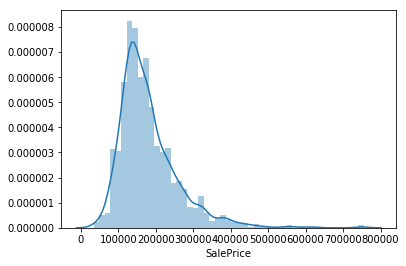

In [53]:
sns.distplot(df['SalePrice'])

In [54]:
skew = df['SalePrice'].skew()
kurt = df['SalePrice'].kurt()
print('Oblicuidad: ', skew)
print('Curtosis: ', kurt)

Oblicuidad:  1.8828757597682129
Curtosis:  6.536281860064529


Como se observa en el histograma, se tiene una oblicuidad alta y positiva, lo que indica que muchas casas son vendidas por encima de la media. Esto se confirma con que la gráfica sea *leptokurtic*, en otras palabras, su cola es larga y ancha.

## Análisis de variables numéricas
### Análisis de correlación

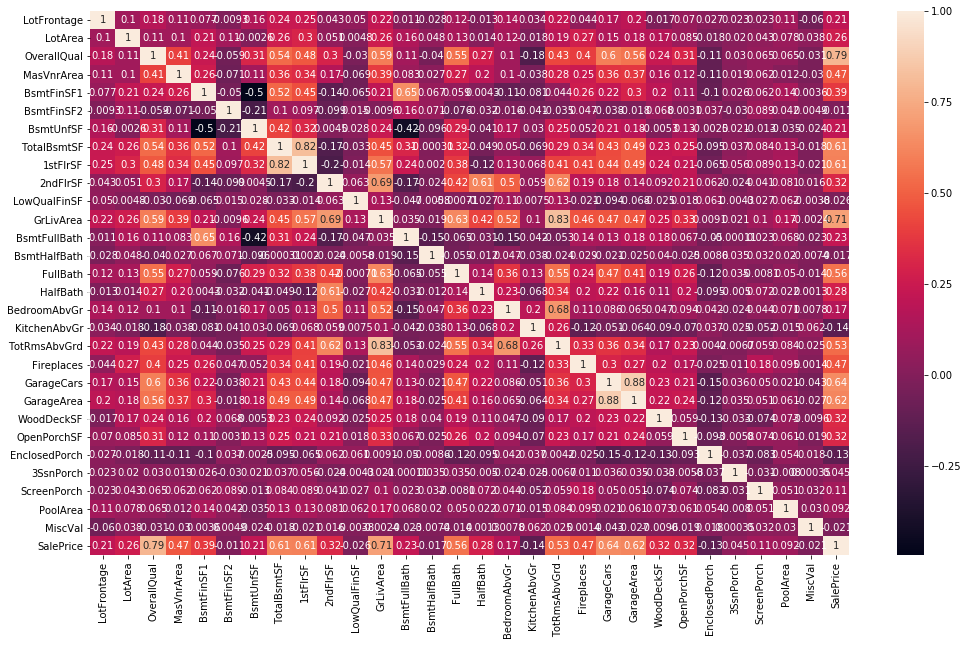

In [55]:
corr_values = df_numerical.corr()
corr_values.style.background_gradient(cmap='Blues')

f, ax = plt.subplots(figsize=(17, 10))
corr = df_numerical.corr()
sns.heatmap(corr, cbar=True, annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)


#### Variables con mayor correlación con el precio de venta
Estas variables serán análizadas a mayor profundidad en las siguientes secciones.
1. GarageArea
2. GarageCars
3. TotRmsAbvGrd
4. TotalBSMTSF
5. 1stFlrSf
7. MasVnrArea
8. GrLivArea
9. FullBath


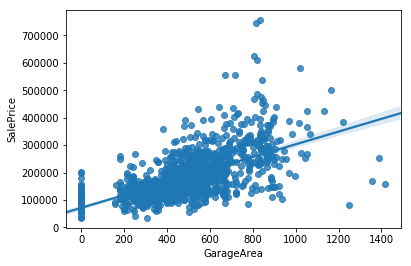

In [56]:
sns.regplot(x="GarageArea",y="SalePrice",data=df_numerical)

In [57]:
regression = stats.linregress(x=df_numerical["GarageArea"],y=df_numerical["SalePrice"])
rsquared = regression.rvalue ** 2
print("Coeficiente r^2: ", rsquared)

Coeficiente r^2:  0.38866675903181896


Se puede observar gracias a la gráfica que existe una gran concentración del tamaño de garage de las casas entre 200-800 pies, manteniendose en un rango de 100000 y 400000 doláres. Por otro lado, es factible asumir que el tamaño del garage de las casas no es un factor que afecte al precio de la misma. Esto es reforzado al ver el valor de correlación, el cual es de 0.3, un valor muy bajo. Por ejemplo se puede observar que existe una casa con espacio de 1200 pies pero su precio es bastante bajo comparado con el grupo de 10000 y 400000 pies. 


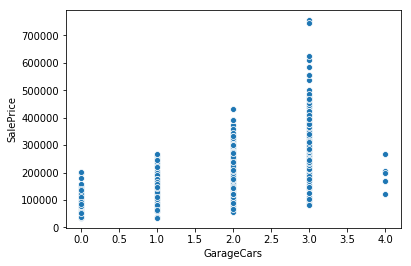

In [58]:
sns.scatterplot(x="GarageCars",y="SalePrice",data=df_numerical)


La cantidad de carros que pueden estar en el garage no es un valor que puede considerarse importante para determinar el valor del precio. Como se observa en la grafica, hay un gran número de casas con espacio para tres carros que varian bastante en precios. Por otro lado, hay casas que tienen más espacio para carros pero en menor precio. 

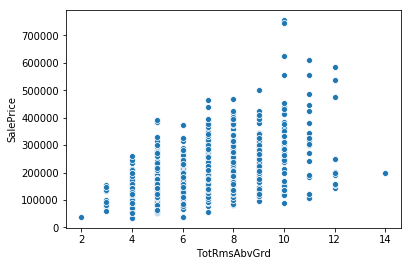

In [59]:
sns.scatterplot(x="TotRmsAbvGrd",y="SalePrice",data=df_numerical)


En base a esta gráfica, existe una gran concentración de casas de seis a diez cuartos con precios entre 100000 y 400000. Existen varios puntos atipicos como son las casas con 14 cuartos a precio entre 200000 y 300000 dolares, pero esa no es la tendencia que muestra la grafica

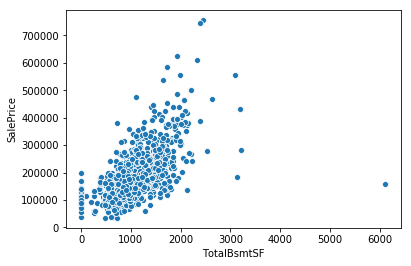

In [60]:
sns.scatterplot(x="TotalBsmtSF",y="SalePrice",data=df_numerical)


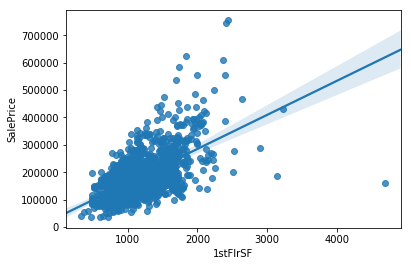

In [61]:
sns.regplot(x="1stFlrSF",y="SalePrice",data=df_numerical)


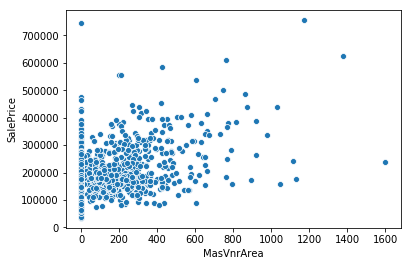

In [62]:
sns.scatterplot(x="MasVnrArea",y="SalePrice",data=df_numerical)


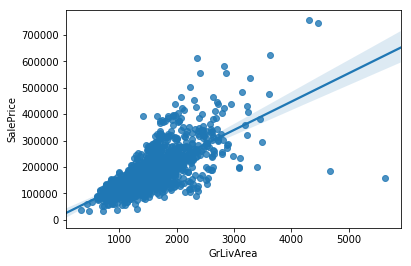

In [63]:
sns.regplot(x="GrLivArea",y="SalePrice",data=df_numerical)


In [64]:
regression = stats.linregress(x=df_numerical["GrLivArea"],y=df_numerical["SalePrice"])
rsquared = regression.rvalue ** 2
print("Coeficiente r^2: ", rsquared)

Coeficiente r^2:  0.5021486502718044


Esta gráfica muestra una tendencia más reconocible. Aunque es cierto que los precios varian entre cada tamaño, es factible decir que entre mayor area de superficie mayor será su precio de venta. Esto es respaldado por su valor de correlación de 0.5. Este pudo ser afectado por valores atipicos, como son los dos de que tienen areas mayores a 4000 pies pero sus precios son bastantes bajos. 

## Análisis de variables categóricas
### Tablas de frecuencia


In [67]:
dfcopy = copy.deepcopy(df_categorical)

for column in dfcopy:
  dfcopy[column]=dfcopy[column].factorize()[0]
dfcopy.drop(["Id"],axis=1,inplace=True)
dfcopy

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,MoSold,YrSold,SaleType,SaleCondition
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,1,1,0,0,1,1,1,1,0,0,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,2,0,0,0
3,2,0,0,1,0,0,2,0,2,0,0,0,0,0,3,3,0,0,2,2,1,1,0,2,1,1,0,1,0,0,1,0,0,0,0,2,1,3,1,0,0,0,0,2,0,1
4,0,0,0,1,0,0,1,0,3,0,0,0,0,0,4,4,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,1,0,4,0,0,0,0,3,0,0,0
5,3,0,0,1,0,0,0,0,4,0,0,0,2,0,5,5,0,0,0,0,1,1,0,3,0,0,0,0,0,0,0,0,0,1,0,0,0,5,1,0,0,0,4,3,0,0
6,1,0,0,0,0,0,0,0,5,0,0,0,1,0,6,6,0,0,0,0,2,0,0,0,2,0,3,0,0,0,0,0,0,0,0,2,0,6,0,0,0,0,5,1,0,0
7,0,0,0,1,0,0,2,0,6,2,0,0,0,2,7,7,0,0,3,3,2,1,0,1,0,0,2,1,1,0,0,0,0,1,0,1,0,7,0,0,0,0,6,3,0,0
8,3,1,0,0,0,0,0,0,7,3,0,0,2,0,8,8,0,0,4,2,1,1,0,2,1,0,0,2,0,0,1,0,1,1,1,1,1,8,1,1,0,0,7,0,0,1
9,4,0,0,0,0,0,2,0,8,3,1,1,3,2,9,8,0,0,1,1,1,1,0,2,1,0,0,0,0,0,0,0,0,1,0,1,0,9,0,2,0,0,8,0,0,0


### Tablas de proporción

### Gráficas de barras
Dentro de las variables que más nos llaman la atención, se encuentra 'OverallQual', la cual indica la calidad de los materiales utilizados para construir la casa.

In [0]:
calidad = pd.concat([df['SalePrice'], df['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(10, 8))
fig = sns.boxplot(x='OverallQual', y="SalePrice", data=calidad)

Como se observa en la gráfica, existe una tendencia a aumentar el precio de la casa según la calidad de los materiales utilizados para construirla. Ahora se analizará el año de construcción de las casas.

In [0]:
calidad = pd.concat([df['SalePrice'], df['YearBuilt']], axis=1)
f, ax = plt.subplots(figsize=(20, 10))
fig = sns.boxplot(x='YearBuilt', y="SalePrice", data=calidad)

Se observa que ha existido un aumento de la media de los precios de las casas según los años en los que han sido contruidas. 

## Análisis de componentes principales (PCA)

In [80]:
pca = PCA(30)
indicatorValues = pd.get_dummies(df)
newDf = indicatorValues.drop(['SalePrice'],axis = 1)
salesPrice = indicatorValues.SalePrice
scaler = StandardScaler()
scaler.fit(newDf)
transformData= scaler.transform(newDf)
x=pca.fit_transform(transformData)
covariance=np.exp(pca.explained_variance_ratio_)

array([1.01048329, 1.00570389, 1.00437009, 1.00420883, 1.00400201,
       1.00369042, 1.00325217, 1.0030294 , 1.00266824, 1.00260375,
       1.00258639, 1.00251398, 1.00241001, 1.00235586, 1.00228173,
       1.00226211, 1.00222088, 1.00220062, 1.00215273, 1.00210193,
       1.00209844, 1.00207927, 1.0020562 , 1.0020492 , 1.00200755,
       1.00197843, 1.0019693 , 1.00195251, 1.00193928, 1.00192429])

In [90]:
covariance=np.cov(x.T)
eigVals,eigVec=np.linalg.eig(covariance)
u,s,v = np.linalg.svd(x)
for ev in eigVec:
  np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
eigPairs = [(np.abs(eigVals[i]), eigVec[:,i]) for i in range(len(eigVals))]
eigPairs.sort()
eigPairs.reverse()
print("Eigen Valores en Orden Descendiente")
for i in eigPairs:
  print(i[0])

Eigen Valores en Orden Descendiente
21.403960345963746
11.673433671238483
8.949663229830737
8.620092342312354
8.197356453872366
7.560306459824011
6.6639330278486595
6.208162352406837
5.46901274906719
5.337013252522605
5.30146708313076
5.153229264546877
4.940360918058012
4.8294980115100445
4.677710733183763
4.637517531535806
4.55309896705778
4.51161207710281
4.413517695429361
4.309487433800671
4.302344615304975
4.2630745971849695
4.215815334193522
4.201484469327609
4.116182822588932
4.056531204353037
4.037832749676986
4.003427058784822
3.9763416008324004
3.9456204483274147


## Análisis de clustering

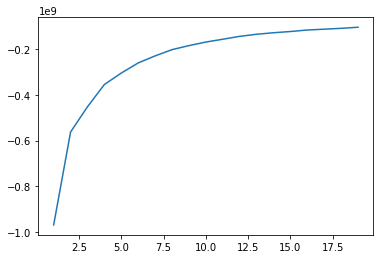

In [102]:
X=np.array(df_numerical[["GarageArea","GarageCars","TotRmsAbvGrd","TotalBsmtSF","1stFlrSF","GrLivArea","FullBath"]])
Y = np.array(df_numerical[["SalePrice"]])
kmeans = [KMeans(n_clusters=i) for i in range(1,20)]
valor = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
plt.plot(range(1,20),valor)

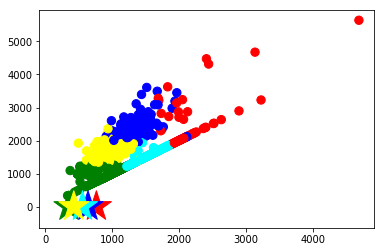

In [111]:
kmeans= KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
labels=kmeans.predict(X)
C = kmeans.cluster_centers_
identifiers=['red','green','blue','cyan','yellow']
asignColors=[]
for i in labels:
  asignColors.append(identifiers[i])
f1 = df_numerical['1stFlrSF'].values
f2 = df_numerical['GrLivArea'].values
 
plt.scatter(f1, f2, c=asignColors, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=identifiers, s=1000)
plt.show()

## Reglas de asociación

## Resumen de hallazgos

### Conclusiones
* Conclusión
